In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing and parsing the date time in USvideos.csv
youtube_data = pd.read_csv("youtube_data/USvideos.csv",
                           parse_dates=["publish_time"])
youtube_data.sample().T

,10633
video_id,bzuXvmsufoM
trending_date,18.06.01
title,America Ferrera's Busy 2018: Pregnancy And The...
channel_title,The Late Show with Stephen Colbert
category_id,24
publish_time,2018-01-04 08:35:00+00:00
tags,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat..."
views,261235
likes,3083
dislikes,255


In [3]:
# Reformat the trending date column into datetime objects by using datetime.strptime
youtube_data["trending_date"] = youtube_data["trending_date"].apply(
    lambda date_string: datetime.strptime(date_string, "%y.%d.%m"))

In [4]:
# Read in the JSON that contains the category names and create a new column called genre for the relevant id
json_data = pd.read_json("youtube_data/US_category_id.json")
dct = {}
json_data["items"].apply(lambda obj: dct.update(
    {obj["id"]: obj["snippet"]["title"]}))
youtube_data["genre"] = youtube_data["category_id"].apply(lambda id: dct[str(id)])

In [5]:
youtube_data.head().T

,0,1,2,3,4
video_id,2kyS6SvSYSE,1ZAPwfrtAFY,5qpjK5DgCt4,puqaWrEC7tY,d380meD0W0M
trending_date,2017-11-14 00:00:00,2017-11-14 00:00:00,2017-11-14 00:00:00,2017-11-14 00:00:00,2017-11-14 00:00:00
title,WE WANT TO TALK ABOUT OUR MARRIAGE,The Trump Presidency: Last Week Tonight with J...,"Racist Superman | Rudy Mancuso, King Bach & Le...",Nickelback Lyrics: Real or Fake?,I Dare You: GOING BALD!?
channel_title,CaseyNeistat,LastWeekTonight,Rudy Mancuso,Good Mythical Morning,nigahiga
category_id,22,24,23,24,24
publish_time,2017-11-13 17:13:01+00:00,2017-11-13 07:30:00+00:00,2017-11-12 19:05:24+00:00,2017-11-13 11:00:04+00:00,2017-11-12 18:01:41+00:00
tags,SHANtell martin,"last week tonight trump presidency|""last week ...","racist superman|""rudy""|""mancuso""|""king""|""bach""...","rhett and link|""gmm""|""good mythical morning""|""...","ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
views,748374,2418783,3191434,343168,2095731
likes,57527,97185,146033,10172,132235
dislikes,2966,6146,5339,666,1989


In [6]:
# youtube_data["likes"].sample(25).plot.hist()
# sns.histplot(youtube_data["likes"], bins=20)



In [7]:
# Remove the Timezone information from the publish_time column to avoid issues subtracting the datetime columns in the data
youtube_data["publish_time"] = youtube_data["publish_time"].apply(lambda x: x.tz_localize(None))
# 



In [8]:
# Floor the publish time by Day to avoid incorrect math being applied later
youtube_data["publish_time"] = youtube_data["publish_time"].dt.floor("D")
youtube_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,genre
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [9]:
# Calculate the time it took for each video to make it onto the Trending page

youtube_data["Time Difference"] = (youtube_data["trending_date"] - youtube_data["publish_time"])
# (youtube_data["trending_date"].dt.date - youtube_data["publish_time"].dt.date)
# youtube_data.iloc[16294]
youtube_data.iloc[youtube_data["Time Difference"].idxmin()]
# youtube_data.tail()

video_id                                                        xL_qpDkF5A8
trending_date                                           2017-11-15 00:00:00
title                     American Crime Story Season 2: The Assassinati...
channel_title                                                     TV Promos
category_id                                                              24
publish_time                                            2017-11-15 00:00:00
tags                      Donatella Versace|"Antonio D' Amico"|"Penelope...
views                                                                 14565
likes                                                                   478
dislikes                                                                 13
comment_count                                                            67
thumbnail_link               https://i.ytimg.com/vi/xL_qpDkF5A8/default.jpg
comments_disabled                                                     False
ratings_disa

<Axes: >

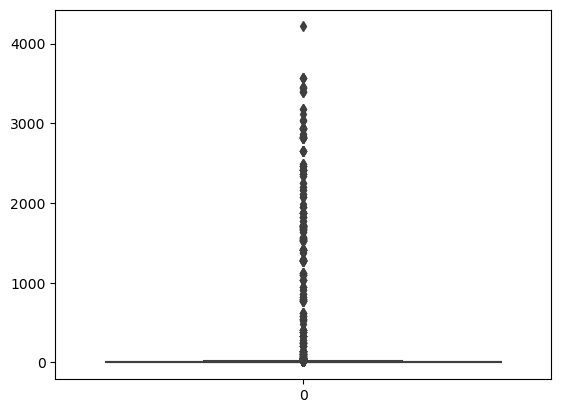

In [10]:
# simple boxplot of all time differences

sns.boxplot(youtube_data["Time Difference"].dt.days)
# youtube_data["Time Difference"][0].days
# type(youtube_data["Time Difference"].dt.date[0])

In [11]:
# random calculations
youtube_data.iloc[16294]
youtube_data["Time Difference"].mean()
youtube_data["Time Difference"].median()


Timedelta('5 days 00:00:00')

<Axes: >

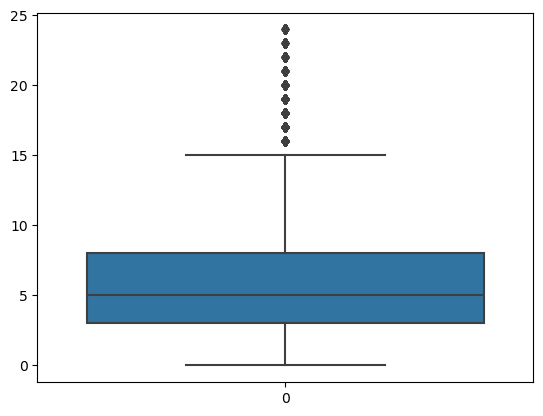

In [12]:
# Next step is to group and categorize to remove outliers
youtube_data["Time Difference"].describe()

removed_outlier_df = youtube_data[youtube_data["Time Difference"] < timedelta(days=25)]
sns.boxplot(removed_outlier_df["Time Difference"].dt.days)


In [13]:
removed_outlier_df["Time Difference"].describe()
only_zeros_df = youtube_data[youtube_data["Time Difference"] <= timedelta(days=0)]
only_zeros_df.size


2178

In [14]:
val_counts_df = youtube_data["Time Difference"].value_counts(normalize=True) 
val_counts_df.loc['0 days']

0.0029548951134337836

<Axes: xlabel='days', ylabel='Frequency'>

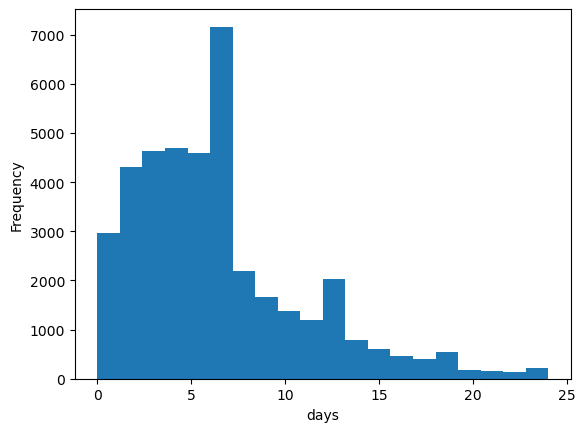

In [15]:
removed_outlier_df["Time Difference"].dt.days.plot.hist(bins=20, xlabel="days")

In [16]:
videos_per_genre = youtube_data.groupby("genre")["video_id"].count()

40132892190

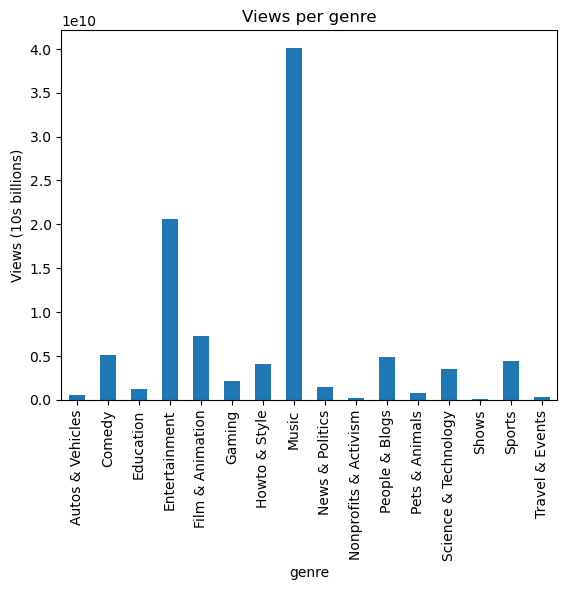

In [17]:
genre_views = youtube_data.groupby("genre")["views"].sum()
genre_views.plot(kind="bar", ylabel="Views (10s billions)", title="Views per genre")

genre_views.max()

In [18]:
views_per_genre = pd.concat([genre_views, videos_per_genre], axis=1)
views_per_genre.sample()

,views,video_id
genre,,
Film & Animation,7284156721,2345


array([[<Axes: title={'center': 'views'}, xlabel='genre'>,
        <Axes: title={'center': 'video_id'}, xlabel='genre'>]],
      dtype=object)

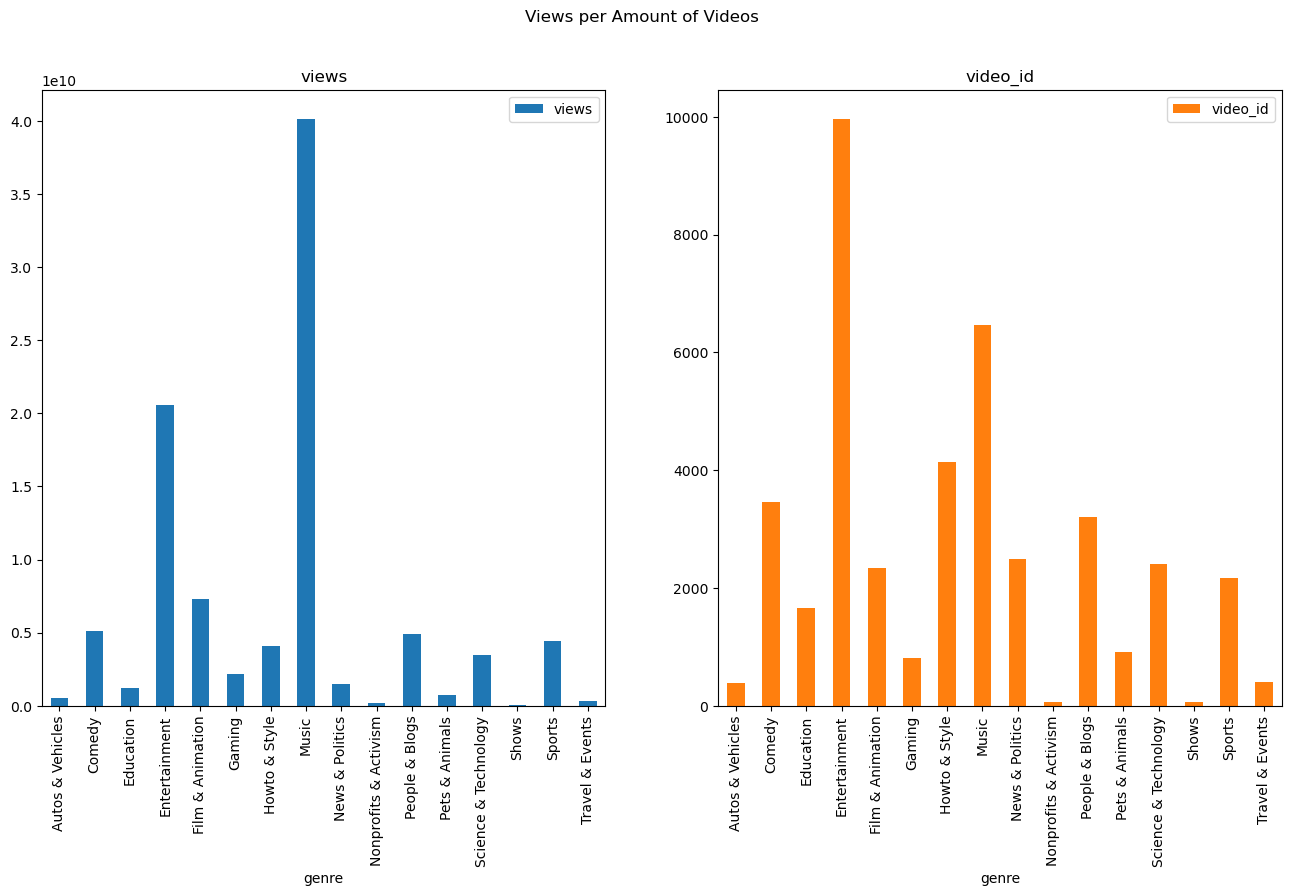

In [19]:
views_per_genre.plot.bar(subplots=True, layout=(1, 2), figsize=(16, 8), title="Views per Amount of Videos")

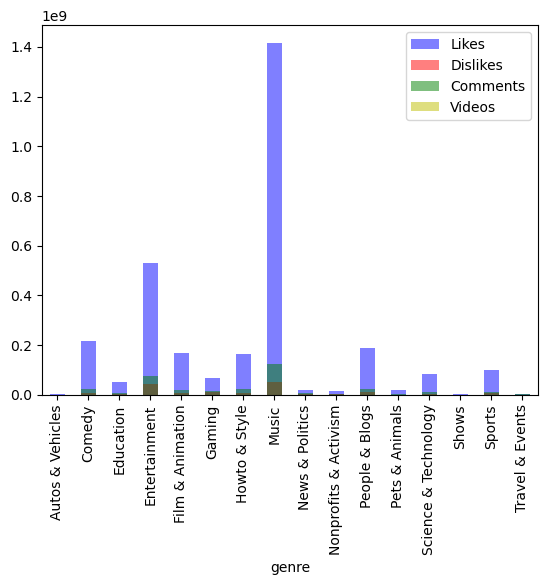

In [20]:
genre_likes = youtube_data.groupby("genre")["likes"].sum()
genre_dislikes = youtube_data.groupby("genre")["dislikes"].sum()
genre_comments = youtube_data.groupby("genre")["comment_count"].sum()
genre_videos = youtube_data.groupby("genre")["video_id"].count()
genre_likes.plot(kind="bar", color='b', alpha=0.5, label='Likes')
genre_dislikes.plot(kind="bar", color='r', alpha=0.5, label='Dislikes')
genre_comments.plot(kind="bar", color='g', alpha=0.5, label='Comments')
genre_videos.plot(kind="bar", color='y', alpha=0.5, label='Videos')
plt.legend()

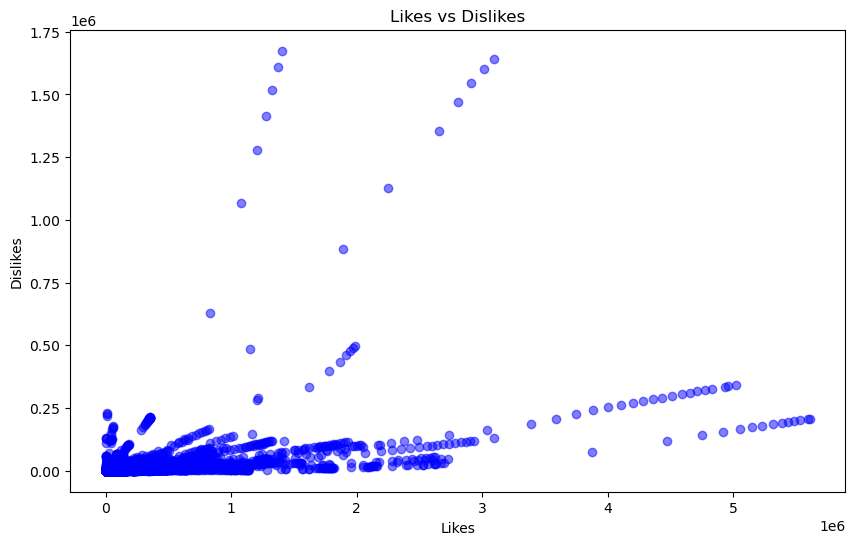

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(youtube_data["likes"], youtube_data["dislikes"], alpha=0.5, color="b")
plt.xlabel("Likes")
plt.ylabel("Dislikes")
plt.title("Likes vs Dislikes")
plt.show()

In [22]:
val_counts_df = (val_counts_df * 100).round()
val_counts_df

Time Difference
4 days       11.0
3 days       11.0
5 days       11.0
2 days       11.0
6 days       10.0
             ... 
584 days      0.0
2933 days     0.0
583 days      0.0
582 days      0.0
1679 days     0.0
Name: proportion, Length: 346, dtype: float64

<Axes: >

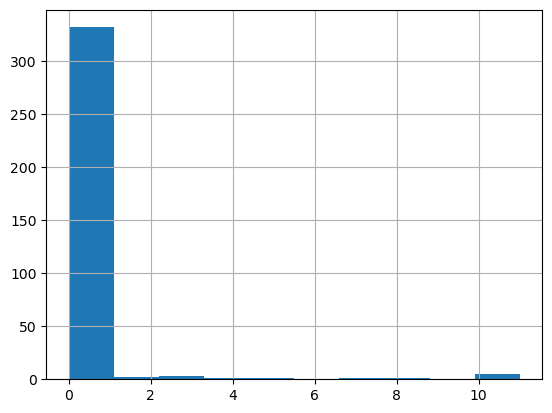

In [23]:
val_counts_df.hist()

In [24]:
import numpy as np

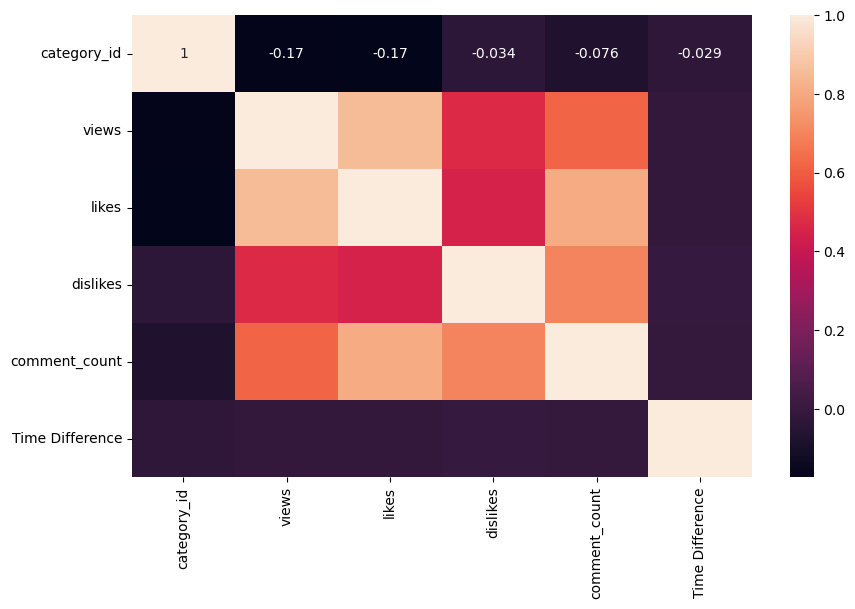

In [25]:
numeric_columns = youtube_data.select_dtypes(include=np.number).columns
correlation_matrix = youtube_data[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [26]:
youtube_data["Time Difference"].values

array([  86400000000000,   86400000000000,  172800000000000, ...,
       2332800000000000, 2419200000000000, 2419200000000000],
      dtype='timedelta64[ns]')

In [32]:
took_long = youtube_data["Time Difference"].idxmax()
longest_vid = youtube_data.iloc[took_long]
longest_vid

video_id                                                        MJO3FmmFuh4
trending_date                                           2018-02-05 00:00:00
title                                      Budweiser - Original Whazzup? ad
channel_title                                                       dannotv
category_id                                                              24
publish_time                                            2006-07-23 00:00:00
tags                                         Budweiser|"Bud"|"Whazzup"|"ad"
views                                                                258506
likes                                                                   459
dislikes                                                                152
comment_count                                                            82
thumbnail_link               https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg
comments_disabled                                                     False
ratings_disa

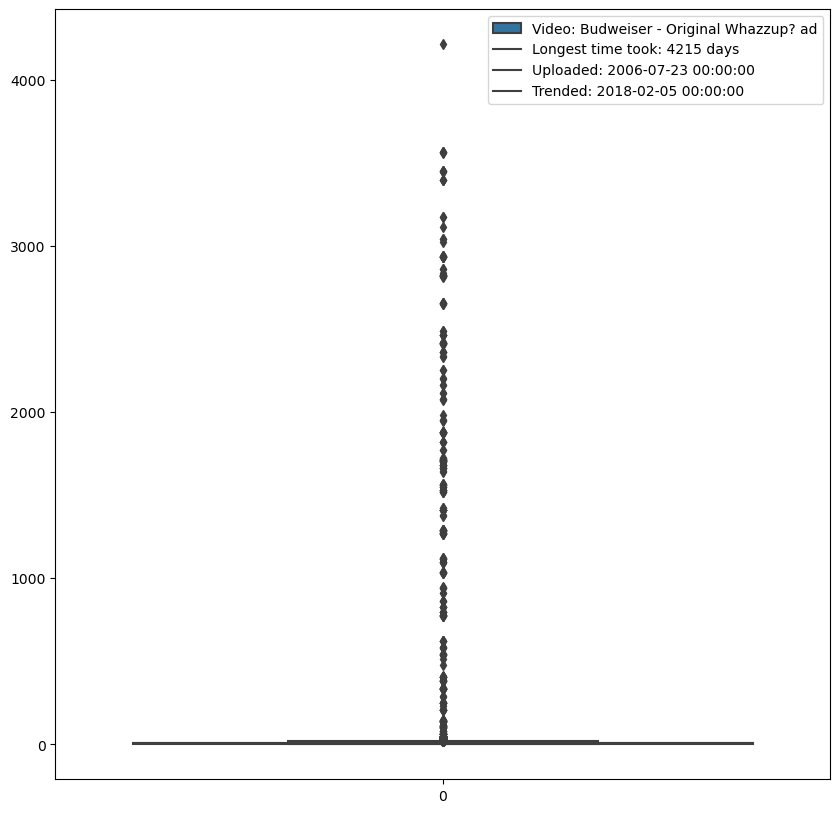

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(youtube_data["Time Difference"].dt.days)
days = longest_vid["Time Difference"].days
uploaded = longest_vid["publish_time"]
trended = longest_vid["trending_date"]
video = longest_vid["title"]
plt.legend(labels=[f"Video: {video}", f"Longest time took: {days} days", f"Uploaded: {uploaded}", f"Trended: {trended}"], loc="best")